In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read saved csv files
TrainVal     = pd.read_csv('00TrainVal.csv',index_col=1,parse_dates=True)
TrainVal.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
TrainVal

,f1,f2,f3,f4,f5,f6
Timestamp,,,,,,
2017-08-17 00:00:00,46.0,38.0,0.0,121.0,65.0,87.0
2017-08-17 00:05:00,37.0,37.0,0.0,109.0,60.0,90.0
2017-08-17 00:10:00,45.0,43.0,0.0,105.0,61.0,87.0
2017-08-17 00:15:00,38.0,35.0,0.0,109.0,68.0,102.0
2017-08-17 00:20:00,36.0,30.0,30.0,94.0,61.0,93.0
...,...,...,...,...,...,...
2018-03-04 23:35:00,46.0,41.0,70.0,118.0,64.0,52.0
2018-03-04 23:40:00,39.0,37.0,53.0,93.0,43.0,28.0
2018-03-04 23:45:00,48.0,54.0,45.0,94.0,39.0,16.0


# Urban Expressway

Oakland CA; Total length = 2,242.16m

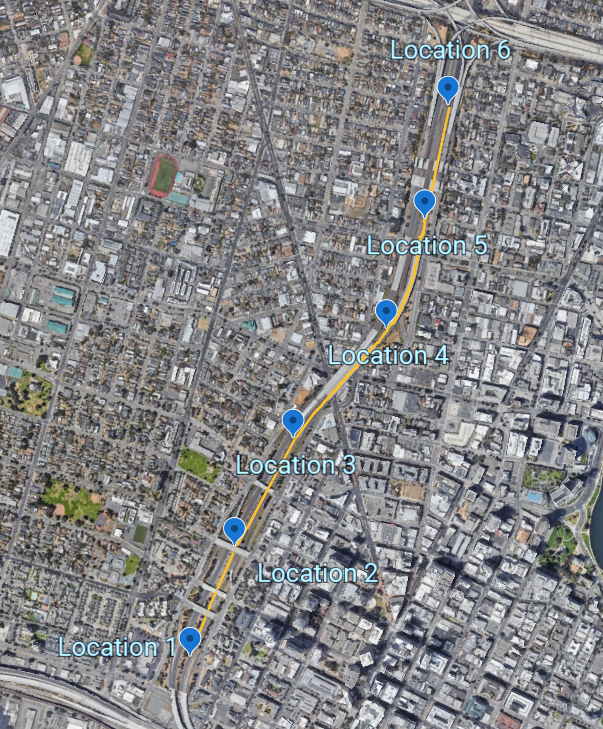

------------------------------------------

# 1) Analysis of dataset

--------------------------------------------

## (i) Spatial Analysis

In [4]:
f1  = TrainVal['f1'][(TrainVal.index.month == 10) & (TrainVal.index.day == 16)]
f2  = TrainVal['f2'][(TrainVal.index.month == 10) & (TrainVal.index.day == 16)]
f3  = TrainVal['f3'][(TrainVal.index.month == 10) & (TrainVal.index.day == 16)]
f4  = TrainVal['f4'][(TrainVal.index.month == 10) & (TrainVal.index.day == 16)]
f5  = TrainVal['f5'][(TrainVal.index.month == 10) & (TrainVal.index.day == 16)]
f6  = TrainVal['f6'][(TrainVal.index.month == 10) & (TrainVal.index.day == 16)]

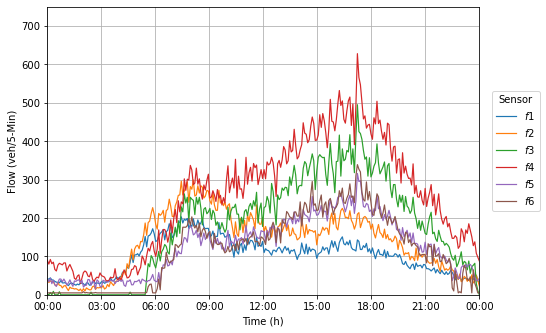

In [5]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x, f1, lw=1.2, label=r'$f1$')
axes.plot(x, f2, lw=1.2, label=r'$f2$')
axes.plot(x, f3, lw=1.2, label=r'$f3$')
axes.plot(x, f4, lw=1.2, label=r'$f4$')
axes.plot(x, f5, lw=1.2, label=r'$f5$')
axes.plot(x, f6, lw=1.2, label=r'$f6$')

axes.set_xlim(0,24)
axes.set_ylim(0,750)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(
    loc='center left',
    bbox_to_anchor=(1.03, 0.5),
    borderaxespad=0,
    title="Sensor"
           )
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

In [6]:
# Pearson correlation coefficient
TrainVal.corr()

,f1,f2,f3,f4,f5,f6
f1,1.000000,0.983304,0.689453,0.653056,0.498786,0.629553
f2,0.983304,1.000000,0.742235,0.706459,0.539868,0.674243
f3,0.689453,0.742235,1.000000,0.973506,0.740646,0.870547
f4,0.653056,0.706459,0.973506,1.000000,0.780152,0.871568
f5,0.498786,0.539868,0.740646,0.780152,1.000000,0.852146
f6,0.629553,0.674243,0.870547,0.871568,0.852146,1.000000


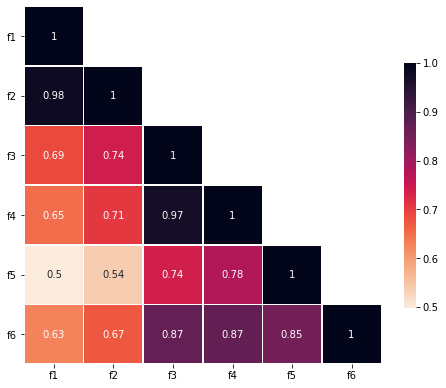

In [7]:
# The above as a plot

corr = TrainVal.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

-------------------

-------------------

## (ii) Temporal Analysis

### (a) Week pattern (mon - mon)

In [8]:
# Typical week flow data for visualization
Week1 = TrainVal[(TrainVal.index.month == 9) & (TrainVal.index.day == 18)]      # Mon 18-10-2017
Week2 = TrainVal[(TrainVal.index.month == 9) & (TrainVal.index.day == 25)]      # Mon 25-09-2017
Week3 = TrainVal[(TrainVal.index.month == 10) & (TrainVal.index.day == 2)]      # Mon 02-10-2017
Week4 = TrainVal[(TrainVal.index.month == 10) & (TrainVal.index.day == 9)]      # Mon 09-10-2017
Week5 = TrainVal[(TrainVal.index.month == 10) & (TrainVal.index.day == 16)]     # Mon 16-10-2017

In [9]:
Week1.index = range(len(Week1))
Week2.index = range(len(Week2))
Week3.index = range(len(Week3))
Week4.index = range(len(Week4))
Week5.index = range(len(Week5))

In [10]:
Week1 # Typical week flow data

,f1,f2,f3,f4,f5,f6
0,42.0,36.0,18.0,86.0,51.0,18.0
1,36.0,27.0,0.0,82.0,51.0,16.0
2,38.0,33.0,11.0,76.0,41.0,16.0
3,47.0,40.0,0.0,72.0,47.0,15.0
4,33.0,23.0,0.0,82.0,57.0,15.0
...,...,...,...,...,...,...
283,45.0,35.0,0.0,108.0,87.0,21.0
284,51.0,47.0,0.0,90.0,63.0,20.0
285,45.0,33.0,22.0,81.0,47.0,20.0
286,41.0,31.0,0.0,77.0,47.0,18.0


In [11]:
data = {
        "Mon 18-09": Week1['f5'],
        "Mon 25-09": Week2['f5'],
        "Mon 02-10": Week3['f5'],
        "Mon 09-10": Week4['f5'],
        "Mon 16-10": Week5['f5'],
        }
day_pattern = pd.concat(data,axis = 1)

In [12]:
day_pattern

,Mon 18-09,Mon 25-09,Mon 02-10,Mon 09-10,Mon 16-10
0,51.0,46.0,41.0,75.0,41.0
1,51.0,29.0,55.0,46.0,34.0
2,41.0,29.0,51.0,76.0,43.0
3,47.0,49.0,29.0,38.0,29.0
4,57.0,46.0,43.0,46.0,38.0
...,...,...,...,...,...
283,87.0,51.0,54.0,51.0,61.0
284,63.0,48.0,59.0,48.0,46.0
285,47.0,46.0,45.0,34.0,37.0
286,47.0,32.0,39.0,61.0,38.0


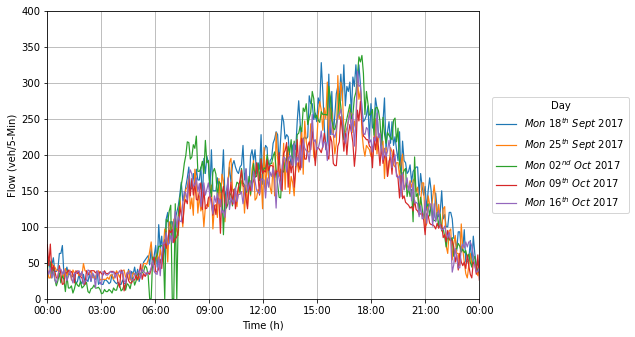

In [13]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x, day_pattern["Mon 18-09"], lw=1.2, label=r'$Mon\ 18^{th}\ Sept\ 2017$')
axes.plot(x, day_pattern["Mon 25-09"], lw=1.2, label=r'$Mon\ 25^{th}\ Sept\ 2017$')
axes.plot(x, day_pattern["Mon 02-10"], lw=1.2, label=r'$Mon\ 02^{nd}\ Oct\ 2017$')
axes.plot(x, day_pattern["Mon 09-10"], lw=1.2, label=r'$Mon\ 09^{th}\ Oct\ 2017$')
axes.plot(x, day_pattern["Mon 16-10"], lw=1.2, label=r'$Mon\ 16^{th}\ Oct\ 2017$')


axes.set_xlim(0,24)
axes.set_ylim(0,400)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(
    loc='center left',
    bbox_to_anchor=(1.03, 0.5),
    borderaxespad=0,
    title="Day"
           )
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

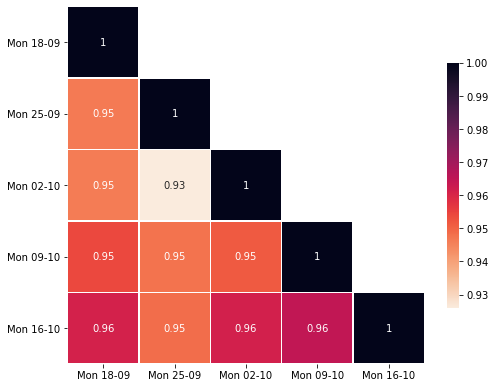

In [14]:
# The above as a plot

corr = day_pattern.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r", fmt='.2g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

## 05/27/2019	Memorial Day	Monday

<AxesSubplot:>

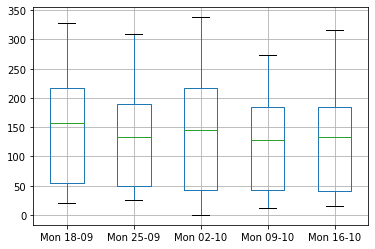

In [15]:
day_pattern.boxplot()

### (b) Day pattern (mon - fri)

In [16]:
day1 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 13)]    # Monday
day2 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 14)]    # Tuesday
day3 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 15)]    # Wednesday
day4 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 16)]    # Thursday
day5 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 17)]   # Friday

In [17]:
day6 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 18)]    # Saturday
day7 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 19)]    # Sunday

In [18]:
day1.index = range(len(day1))
day2.index = range(len(day2))
day3.index = range(len(day3))
day4.index = range(len(day4))
day5.index = range(len(day5))
day6.index = range(len(day6))
day7.index = range(len(day7))

In [19]:
day1

,f1,f2,f3,f4,f5,f6
0,39.0,35.0,56.0,90.0,32.0,5.0
1,43.0,36.0,67.0,123.0,41.0,6.0
2,40.0,35.0,57.0,119.0,51.0,5.0
3,36.0,27.0,3.0,109.0,56.0,5.0
4,35.0,33.0,20.0,115.0,56.0,5.0
...,...,...,...,...,...,...
283,40.0,42.0,79.0,111.0,44.0,37.0
284,39.0,34.0,74.0,129.0,46.0,31.0
285,38.0,28.0,61.0,110.0,38.0,5.0
286,40.0,38.0,61.0,103.0,38.0,5.0


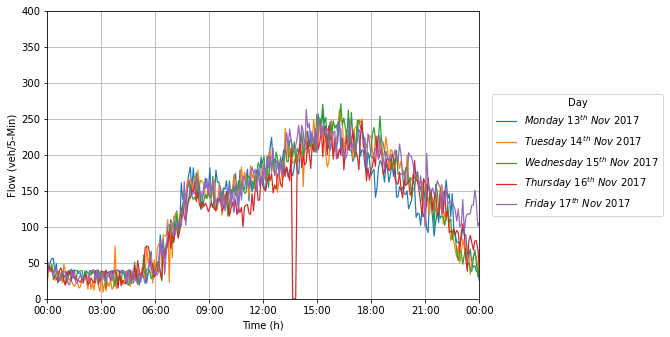

In [20]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x,day1['f5'], lw=1.2, label=r'$Monday\ 13^{th}\ Nov\ 2017$')
axes.plot(x,day2['f5'], lw=1.2, label=r'$Tuesday\ 14^{th}\ Nov\ 2017$')
axes.plot(x,day3['f5'], lw=1.2, label=r'$Wednesday\ 15^{th}\ Nov\ 2017$')
axes.plot(x,day4['f5'], lw=1.2, label=r'$Thursday\ 16^{th}\ Nov\ 2017$')
axes.plot(x,day5['f5'], lw=1.2, label=r'$Friday\ 17^{th}\ Nov\ 2017$')

axes.set_xlim(0,24)
axes.set_ylim(0,400)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(
    loc='center left',
    bbox_to_anchor=(1.03, 0.5),
    borderaxespad=0,
    title="Day"
           )
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

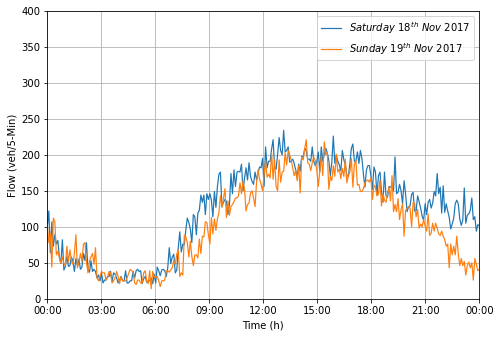

In [21]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x,day6['f5'], lw=1.2, label=r'$Saturday\ 18^{th}\ Nov\ 2017$')
axes.plot(x,day7['f5'], lw=1.2, label=r'$Sunday\ 19^{th}\ Nov\ 2017$')

axes.set_xlim(0,24)
axes.set_ylim(0,400)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

In [22]:
day1 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 6)]    # Monday
day2 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 7)]    # Tuesday
day3 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 8)]    # Wednesday
day4 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 9)]    # Thursday
day5 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 10)]   # Friday
day6 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 11)]    # Saturday
day7 = TrainVal[(TrainVal.index.month == 11) & (TrainVal.index.day == 12)]    # Sunday

day1.index = range(len(day1))
day2.index = range(len(day2))
day3.index = range(len(day3))
day4.index = range(len(day4))
day5.index = range(len(day5))
day6.index = range(len(day6))
day7.index = range(len(day7))

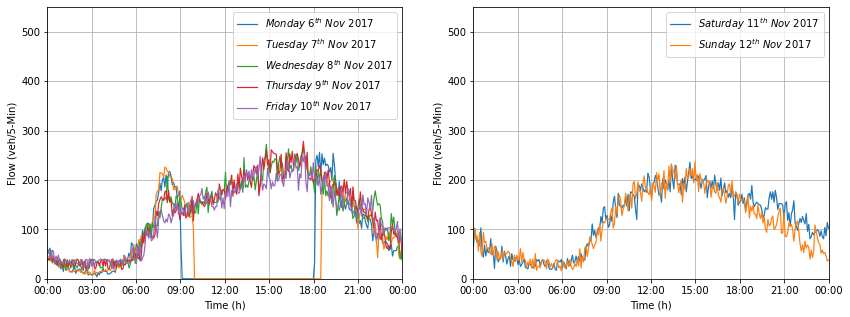

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(14,5))

axes[0].plot(x,day1['f5'], lw=1.2, label=r'$Monday\ 6^{th}\ Nov\ 2017$')
axes[0].plot(x,day2['f5'], lw=1.2, label=r'$Tuesday\ 7^{th}\ Nov\ 2017$')
axes[0].plot(x,day3['f5'], lw=1.2, label=r'$Wednesday\ 8^{th}\ Nov\ 2017$')
axes[0].plot(x,day4['f5'], lw=1.2, label=r'$Thursday\ 9^{th}\ Nov\ 2017$')
axes[0].plot(x,day5['f5'], lw=1.2, label=r'$Friday\ 10^{th}\ Nov\ 2017$')

axes[1].plot(x,day6['f5'], lw=1.2, label=r'$Saturday\ 11^{th}\ Nov\ 2017$')
axes[1].plot(x,day7['f5'], lw=1.2, label=r'$Sunday\ 12^{th}\ Nov\ 2017$')

for i in range(0,2):
    axes[i].set_xlim(0,24)
    axes[i].set_ylim(0,550)
    axes[i].set_xlabel('Time (h)')
    axes[i].set_ylabel('Flow (veh/5-Min)')

    axes[i].legend(loc=1)
    axes[i].grid()

    axes[i].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
    axes[i].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])
    
plt.show()

In [24]:
data = {
        "Mon": day1['f5'],
        "Tue": day2['f5'],
        "Wed": day3['f5'],
        "Thu": day4['f5'],
        "Fri": day5['f5'],
        "Sat": day6['f5'],
        "Sun": day7['f5'],
        }
week_pattern = pd.concat(data,axis = 1)

In [25]:
week_pattern 

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,50.0,49.0,41.0,35.0,55.0,66.0,90.0
1,53.0,44.0,41.0,41.0,58.0,102.0,101.0
2,62.0,44.0,41.0,37.0,48.0,86.0,79.0
3,52.0,36.0,56.0,46.0,38.0,73.0,87.0
4,46.0,45.0,32.0,36.0,58.0,78.0,56.0
...,...,...,...,...,...,...,...
283,65.0,98.0,83.0,84.0,116.0,81.0,51.0
284,64.0,48.0,92.0,73.0,78.0,104.0,53.0
285,51.0,40.0,43.0,87.0,101.0,87.0,46.0
286,50.0,56.0,40.0,76.0,73.0,114.0,36.0


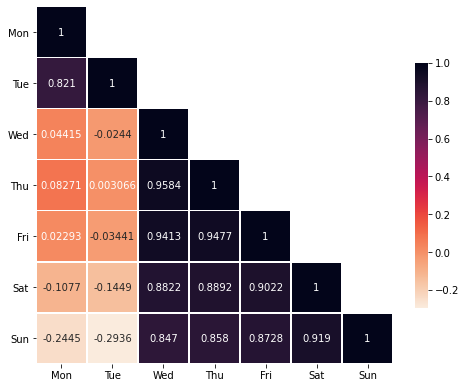

In [26]:
# The above as a plot

corr = week_pattern.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r", fmt='.4g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

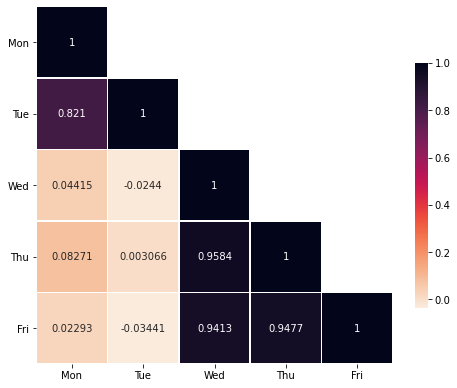

In [27]:
# The above as a plot (just Monday to Friday)

corr = week_pattern.drop(columns=["Sat","Sun"]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r", fmt='.4g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

<AxesSubplot:>

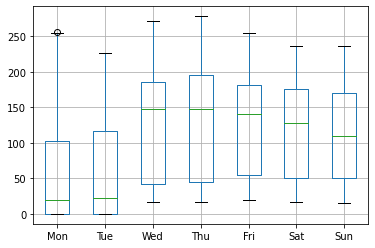

In [28]:
week_pattern.boxplot()